In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sin, cos, radians

In [2]:
nfl_dat = pd.read_csv('data/train.csv')
print(nfl_dat.shape)
nfl_dat.head()

C:\Users\Mike\AppData\Local\Continuum\anaconda3\envs\geo\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(682154, 49)


,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [3]:
# Let us try to figure out where the play granularity items are:
nfl_dat.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'],
      dtype='object')

In [4]:
play_cols = []
indiv_cols = []

for col in nfl_dat.columns:
    unique_val = len(nfl_dat[col].head(22).unique())
    print('For ',col,'there are ',unique_val,'unique values in the first play')
    if unique_val == 1:
        play_cols.append(col)
    else:
        indiv_cols.append(col)

For  GameId there are  1 unique values in the first play
For  PlayId there are  1 unique values in the first play
For  Team there are  2 unique values in the first play
For  X there are  21 unique values in the first play
For  Y there are  22 unique values in the first play
For  S there are  21 unique values in the first play
For  A there are  22 unique values in the first play
For  Dis there are  18 unique values in the first play
For  Orientation there are  22 unique values in the first play
For  Dir there are  22 unique values in the first play
For  NflId there are  22 unique values in the first play
For  DisplayName there are  22 unique values in the first play
For  JerseyNumber there are  22 unique values in the first play
For  Season there are  1 unique values in the first play
For  YardLine there are  1 unique values in the first play
For  Quarter there are  1 unique values in the first play
For  GameClock there are  1 unique values in the first play
For  PossessionTeam there ar

In [5]:
# This should be a run-level dataset, stripped of unique information
plays_dat = nfl_dat[play_cols].copy()
plays_dat.drop_duplicates(inplace=True)
plays_dat.reset_index(inplace=True,drop=True)
print(plays_dat.shape)
plays_dat.head()

(31020, 33)


,GameId,PlayId,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,2017,35,1,14:14:00,NE,3,2,NE,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000139,2017,43,1,13:52:00,NE,1,10,NE,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000189,2017,35,1,13:02:00,NE,1,10,KC,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000345,2017,2,1,12:12:00,NE,2,2,KC,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000395,2017,25,1,12:08:00,KC,1,10,KC,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [6]:
# Let us check to see if that is the case:
print(len(plays_dat.PlayId.unique()),'play IDs')
print(plays_dat.shape[0],'rows in data-set')

31007 play IDs
31020 rows in data-set


In [7]:
# close but why the discrepancy?
dupes_list = plays_dat.PlayId.value_counts().head(13).index.tolist()
for col in plays_dat:
    unique_val = len(plays_dat[plays_dat.PlayId.isin(dupes_list)][col].head(2).unique())
    if unique_val > 1:
        print(col)

WindSpeed


In [8]:
plays_dat[plays_dat.PlayId.isin(dupes_list)]['WindSpeed'].head(4).unique()

array([10, '10', 5.0, '5'], dtype=object)

In [9]:
# Looks like windspeed needs to be converted:
plays_dat.WindSpeed = pd.to_numeric(plays_dat['WindSpeed'], errors='coerce').fillna(0.0)

In [10]:
# Now, re de-dupe dataset:
plays_dat2 = plays_dat.copy()
plays_dat2.drop_duplicates(inplace=True)
plays_dat2.reset_index(inplace=True,drop=True)
print(plays_dat2.shape)
plays_dat2.head()

(31007, 33)


,GameId,PlayId,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,2017,35,1,14:14:00,NE,3,2,NE,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
1,2017090700,20170907000139,2017,43,1,13:52:00,NE,1,10,NE,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
2,2017090700,20170907000189,2017,35,1,13:02:00,NE,1,10,KC,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
3,2017090700,20170907000345,2017,2,1,12:12:00,NE,2,2,KC,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
4,2017090700,20170907000395,2017,25,1,12:08:00,KC,1,10,KC,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW


In [11]:
# Check again, for sanity:
print(len(plays_dat2.PlayId.unique()),'play IDs')
print(plays_dat2.shape[0],'rows in data-set')

31007 play IDs
31007 rows in data-set


In [12]:
# Let us get our players data
indiv_cols.append('GameId')
indiv_cols.append('PlayId')
players_dat = nfl_dat[indiv_cols]
players_dat.head()

,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,GameId,PlayId
0,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,6-0,212,12/29/1988,Tennessee,SS,2017090700,20170907000118
1,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,6-3,288,03/25/1989,Miami,DE,2017090700,20170907000118
2,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,6-3,270,01/21/1989,Georgia,DE,2017090700,20170907000118
3,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,6-3,245,11/22/1982,Texas,ILB,2017090700,20170907000118
4,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,6-0,206,08/17/1987,Newberry,FS,2017090700,20170907000118


In [13]:
# Rusher Data:
rushers_dat = pd.merge(plays_dat2, players_dat,  how='left', left_on=['GameId','PlayId','NflIdRusher'], right_on = ['GameId','PlayId','NflId'])

In [14]:
print(rushers_dat.shape)
rushers_dat.head()

(31007, 49)


,GameId,PlayId,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,...,Orientation,Dir,NflId,DisplayName,JerseyNumber,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position
0,2017090700,20170907000118,2017,35,1,14:14:00,NE,3,2,NE,...,161.98,245.74,2543773,James White,28,5-10,205,02/03/1992,Wisconsin,RB
1,2017090700,20170907000139,2017,43,1,13:52:00,NE,1,10,NE,...,210.70,312.20,2543773,James White,28,5-10,205,02/03/1992,Wisconsin,RB
2,2017090700,20170907000189,2017,35,1,13:02:00,NE,1,10,KC,...,140.82,221.96,2543773,James White,28,5-10,205,02/03/1992,Wisconsin,RB
3,2017090700,20170907000345,2017,2,1,12:12:00,NE,2,2,KC,...,186.22,275.44,2539663,Mike Gillislee,35,5-11,210,11/01/1990,Florida,RB
4,2017090700,20170907000395,2017,25,1,12:08:00,KC,1,10,KC,...,34.27,157.92,2557917,Kareem Hunt,27,5-11,216,08/06/1995,Toledo,RB


In [15]:
rushers_dat[['GameId','X','Y','Orientation','Dir','S','A','Dis','Team','PlayDirection']].head(10)

,GameId,X,Y,Orientation,Dir,S,A,Dis,Team,PlayDirection
0,2017090700,78.75,30.53,161.98,245.74,3.63,3.35,0.38,home,left
1,2017090700,71.07,27.16,210.70,312.20,3.06,2.41,0.34,home,left
2,2017090700,48.66,19.11,140.82,221.96,5.77,2.42,0.60,home,left
3,2017090700,15.53,25.36,186.22,275.44,4.45,3.20,0.46,home,left
4,2017090700,29.99,27.12,34.27,157.92,3.90,2.53,0.44,away,right
5,2017090700,42.88,22.73,189.77,319.67,3.32,2.76,0.44,home,left
6,2017090700,35.28,24.98,149.73,203.83,4.80,2.02,0.54,home,left
7,2017090700,22.74,25.43,205.60,282.12,3.65,1.18,0.51,home,left
8,2017090700,14.57,22.25,16.13,129.93,4.77,3.10,0.51,away,right
9,2017090700,53.64,27.84,21.53,141.28,3.64,2.63,0.38,away,right


In [16]:
rushers_dat.to_csv('rushers_data.csv',index=False)

In [17]:
(sin(radians(245.7))*0.38)+30.53

30.183666754878534

In [18]:
(cos(radians(245.7))*0.38)+78.75

78.59362454373006

In [19]:
(30.53-30.18)+(78.75-78.59)

0.509999999999998

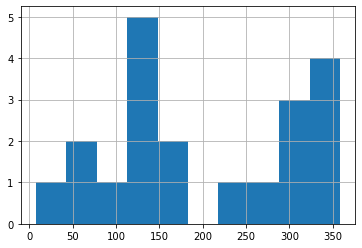

In [20]:
rushers_dat[(rushers_dat['GameId']==2017090700) & (rushers_dat['Team']=='away')].Dir.hist()

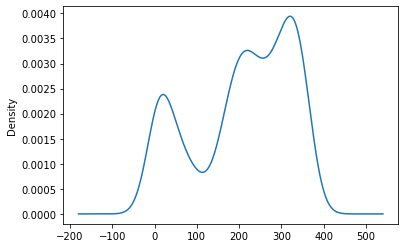

In [21]:
rushers_dat[(rushers_dat['Orientation']>180) & (rushers_dat['Position'] != 'RB')]['Dir'].plot.kde()

In [22]:
rushers_dat_new = rushers_dat.copy()

In [23]:
for i in range(len(rushers_dat_new)):
    if rushers_dat_new.iloc[i]['Orientation']>180:
        old_dir, old_x, old_y = rushers_dat_new.iloc[i]['Dir'],rushers_dat_new.iloc[i]['X'],rushers_dat_new.iloc[i]['Y']
        rushers_dat_new.at[i,'Dir'] = old_dir - 180
        rushers_dat_new.at[i,'X'] = 120 - old_x
        rushers_dat_new.at[i,'Y'] = 53.3 - old_y

In [24]:
rushers_dat_new[['GameId','X','Y','Orientation','Dir','S','A','Dis','Team','PlayDirection','Yards']].head(10)

,GameId,X,Y,Orientation,Dir,S,A,Dis,Team,PlayDirection,Yards
0,2017090700,78.75,30.53,161.98,245.74,3.63,3.35,0.38,home,left,8
1,2017090700,48.93,26.14,210.70,132.20,3.06,2.41,0.34,home,left,3
2,2017090700,48.66,19.11,140.82,221.96,5.77,2.42,0.60,home,left,5
3,2017090700,104.47,27.94,186.22,95.44,4.45,3.20,0.46,home,left,2
4,2017090700,29.99,27.12,34.27,157.92,3.90,2.53,0.44,away,right,7
5,2017090700,77.12,30.57,189.77,139.67,3.32,2.76,0.44,home,left,10
6,2017090700,35.28,24.98,149.73,203.83,4.80,2.02,0.54,home,left,-1
7,2017090700,97.26,27.87,205.60,102.12,3.65,1.18,0.51,home,left,0
8,2017090700,14.57,22.25,16.13,129.93,4.77,3.10,0.51,away,right,9
9,2017090700,53.64,27.84,21.53,141.28,3.64,2.63,0.38,away,right,9


In [25]:
rushers_dat_new['X1'] = ((np.cos(np.radians(rushers_dat_new['Dir'])))*rushers_dat_new['Yards'])+rushers_dat_new['X']
rushers_dat_new['Y1'] = ((np.sin(np.radians(rushers_dat_new['Dir'])))*rushers_dat_new['Yards'])+rushers_dat_new['Y']

In [26]:
export_cols = ['GameId', 'Season','HomeTeamAbbr', 'VisitorTeamAbbr',
               'PossessionTeam','Team','Week', 'Quarter',
               'Down', 'Distance', 'FieldPosition',
               'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
               'OffenseFormation', 'DefendersInTheBox',
               'Yards', 'X', 'Y', 'S', 'A', 'Dis',
               'Orientation', 'Dir', 'DisplayName', 'JerseyNumber',
               'PlayerHeight', 'PlayerWeight', 'PlayerCollegeName',
               'Position', 'X1', 'Y1']
rushers_dat_new[export_cols].to_csv('rushers_lines.csv',index=False)

In [27]:
rushers_dat_new[export_cols].head(500).to_csv('rushers_500.csv',index=False)

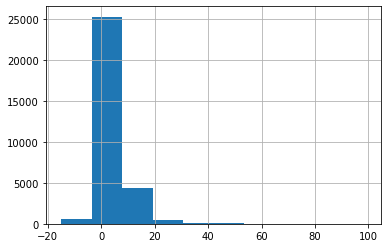

In [28]:
rushers_dat_new.Yards.hist()